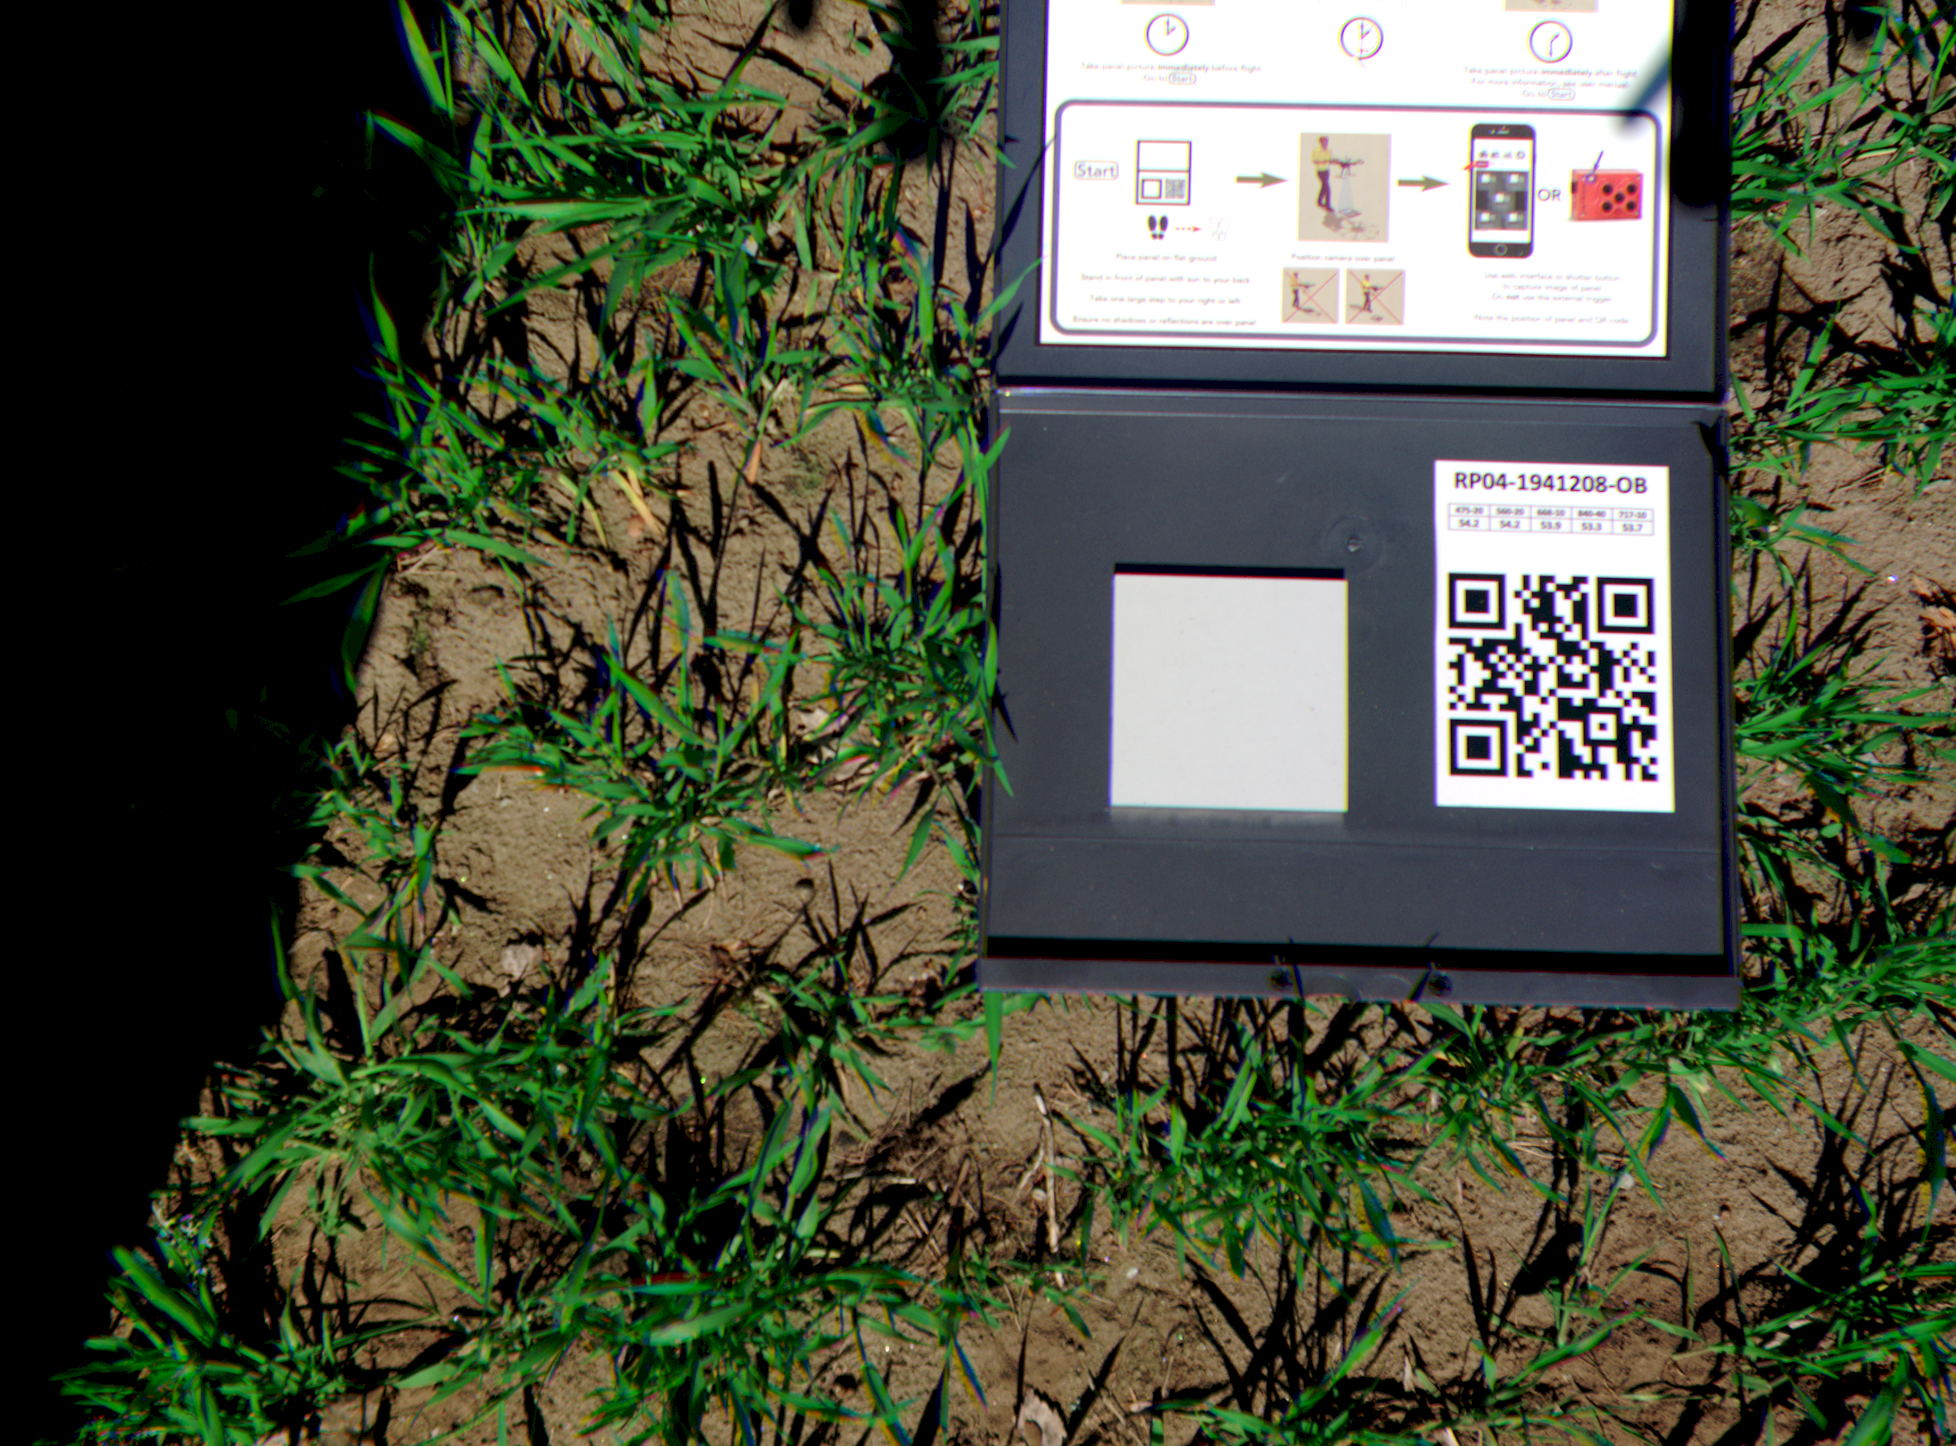

In [1]:
from IPython.display import Image
Image(filename="labeling_project/upload/image.png") 

In [2]:
import shapely.geometry as sg
import shapely.ops as so
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import json
with open('result.json') as json_file: 
    data = json.load(json_file)
# Unwrapping json
data = (data[0]["completions"][0]["result"])
# Specifying path to coordinates
#coordinates = (data[0]["value"]["points"])

In [4]:
# Creating lists of polygons depending on their label
collection1 = []
collection2 = []
collection3 = []
k = 0
while k < len(data):    
    def convert(list): 
        return tuple(list)
    coordinates_tupled = []
    coordinates = (data[k]["value"]["points"])
    for i in coordinates:
        coordinates_tupled.append(convert(i))
    if data[k]["value"]["polygonlabels"][0] == "Ignore":
        collection1.append(sg.Polygon(coordinates_tupled))
    elif data[k]["value"]["polygonlabels"][0] == "Vegetation":
        collection2.append(sg.Polygon(coordinates_tupled))
    elif data[k]["value"]["polygonlabels"][0] == "Soil":
        collection3.append(sg.Polygon(coordinates_tupled))
    k = k + 1

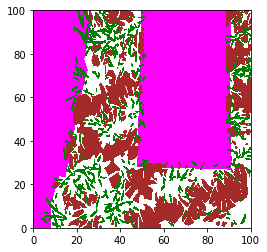

In [5]:
# Assigning lists of polygons to multipolygons
new_shape1 = sg.MultiPolygon(collection1)
new_shape2 = sg.MultiPolygon(collection2)
new_shape3 = sg.MultiPolygon(collection3)

fig, axs = plt.subplots()
axs.set_aspect('equal')

# Plotting multipolygons with colors depending on their labels

for geom in new_shape1.geoms:    
    xs, ys = geom.exterior.xy    
    axs.fill(xs, 100-np.array(ys), alpha=1, fc='magenta', ec='none', antialiased = False)
    
for geom in new_shape2.geoms:    
    xs, ys = geom.exterior.xy    
    axs.fill(xs, 100-np.array(ys), alpha=1, fc='green', ec='none', antialiased = False)
    
for geom in new_shape3.geoms:    
    xs, ys = geom.exterior.xy    
    axs.fill(xs, 100-np.array(ys), alpha=1, fc='brown', ec='none', antialiased = False)
    
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.plot(antialiased=False)
plt.show()

In [6]:
a = np.zeros((1446, 1956, 3))
plt.imsave('new.png', a)

In [7]:
coordinates = (data[2]["value"]["points"])
print(coordinates)

[[20.463583276915255, 0.003945274137762014], [20.958714982143036, 3.1913058555392215], [21.074633688298153, 3.723393871491994], [21.54194310364653, 5.0314179570424145], [22.034512487392092, 6.459130521009217], [22.432356989648145, 7.288400692894123], [22.861776452400694, 7.570523534875587], [22.647066721024412, 6.36508957368206], [22.48287692644256, 5.6811554113027585], [22.085032424186515, 4.048262598622164], [22.735476610414644, 3.7490414025812164], [22.748106594613247, 4.527016512287677], [22.811256515606278, 5.621311172094566], [22.905981397095807, 6.185556856057494], [22.899666404996523, 7.0832204441803315], [22.931241365493022, 7.621818597054037], [23.044911223280458, 8.143318395868256], [23.133321112670696, 8.254457697254894], [23.158581081067904, 7.929588970124721], [23.05122621537976, 6.527523937247148], [23.038596231181156, 6.040220846551893], [22.912296389195106, 4.202147785157508], [22.836516484003486, 3.714844694462253], [22.785996547209066, 2.9967138239639803], [22.741791

In [8]:
def coordinate(label):
    z = 0
    allrr = np.empty([0], dtype = np.int64)
    allcc = np.empty([0], dtype = np.int64)
    while z < len(data):
        if data[z]["value"]["polygonlabels"][0] == label:
            coordinates = (data[z]["value"]["points"])
            i = 0
            r = []
            c = []
            while i < len(coordinates):
                r.append(coordinates[i][1] / 100 * 1446 - 0.5)
                c.append(coordinates[i][0] / 100 * 1956 - 0.5)
                i = i + 1
            rr, cc = polygon(r, c, shape=[1446, 1956])
            allrr = np.append(allrr, rr)
            allcc = np.append(allcc, cc)
        z = z + 1
    return [allrr, allcc]

In [9]:
from skimage.draw import polygon
img = np.zeros((1446, 1956, 3), dtype = np.uint8)
img[tuple(coordinate("Vegetation"))] = [0,255,0]
img[tuple(coordinate("Soil"))] = [165,42,42]
img[tuple(coordinate("Ignore"))] = [255,0,255]
img
plt.imsave('img4.png', img)

In [10]:
def coordInColor(mask, rgb):
    return np.where(np.all(mask[:,:] == rgb, axis=2))

In [11]:
print(coordInColor(img, [0,255,0]))
print((coordInColor(img, [0,255,0])[0][1000].item()))
print(len(coordInColor(img, [0,255,0])[1]))
print(coordInColor(img, [0,255,0])[1])

(array([   0,    0,    0, ..., 1443, 1443, 1443], dtype=int64), array([592, 593, 594, ..., 504, 505, 902], dtype=int64))
42
84792
[592 593 594 ... 504 505 902]


In [12]:
import PIL
sampleimg = PIL.Image.open("labeling_project/upload/image.png")
sampleimg_rgb = np.array(sampleimg.convert("RGB"))
print(sampleimg_rgb)
print(sampleimg_rgb[1445, 1955]) # [y, x]

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0  22   0]
  [  0  22   0]
  [  0  22   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0  22   0]
  [  0  22   0]
  [  0  22   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0  22   0]
  [  0  22   0]
  [  0  22   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 34  22  22]
  [ 34  22  34]
  [ 42  34  42]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 90  42  34]
  [ 66  42  34]
  [ 50  42  34]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [122  71  50]
  [115  79  42]
  [ 90  71  50]]]
[90 71 50]


In [13]:
def pixelToRGB(imageRGB, mask, rgb): # rgb = [r, g, b]
    return imageRGB[np.where(np.all(mask[:,:] == rgb, axis=2))]

In [14]:
vegetationPixelsRGB = pixelToRGB(sampleimg_rgb, img, [0, 255, 0])
soilPixelsRGB = pixelToRGB(sampleimg_rgb, img, [165, 42, 42])
display(soilPixelsRGB)

array([[120,  86,  42],
       [131, 102,  61],
       [135,  99,  66],
       ...,
       [152, 118,  79],
       [120,  86,  56],
       [ 71,  50,  34]], dtype=uint8)

In [15]:
def descriptives(list):
    print("Number of observations: " + str(len(list[0])))
    print("Median: " + str(int(np.percentile(list[0], 50))) + " " + str(int(np.percentile(list[1], 50))) + " " + str(int(np.percentile(list[2], 50))))
    print("75th percentile: " + str(int(np.percentile(list[0], 75))) + " " + str(int(np.percentile(list[1], 75))) + " " + str(int(np.percentile(list[2], 75))))
    print("25th percentile: " + str(int(np.percentile(list[0], 25))) + " " + str(int(np.percentile(list[1], 25))) + " " + str(int(np.percentile(list[2], 25))))
    print("99th percentile: " + str(int(np.percentile(list[0], 99))) + " " + str(int(np.percentile(list[1], 99))) + " " + str(int(np.percentile(list[2], 99))))
    print("1st percentile: " + str(int(np.percentile(list[0], 1))) + " " + str(int(np.percentile(list[1], 1))) + " " + str(int(np.percentile(list[2], 1))))
    kwargs = dict(alpha=0.3, bins=50)
    plt.hist((list[0]), **kwargs, color='r')
    plt.hist((list[1]), **kwargs, color='g')
    plt.hist((list[2]), **kwargs, color='b')
    plt.gca().set(title='RGB distribution', ylabel='Frequency')
    plt.xlim(0,256)
    plt.show();

Number of observations: 84792
Median: 42 120 42
75th percentile: 56 139 50
25th percentile: 22 90 22
99th percentile: 113 168 99
1st percentile: 0 22 0


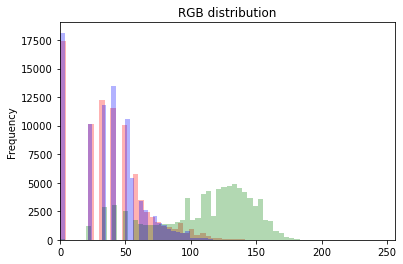

In [16]:
descriptives(np.transpose(vegetationPixelsRGB))

Number of observations: 461350
Median: 120 96 61
75th percentile: 139 118 86
25th percentile: 71 50 34
99th percentile: 167 147 120
1st percentile: 0 0 0


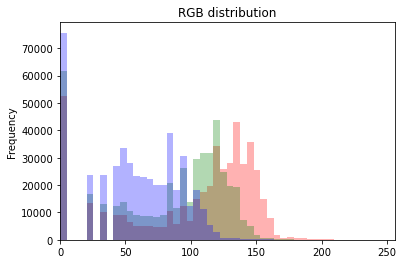

In [17]:
descriptives(np.transpose(soilPixelsRGB))

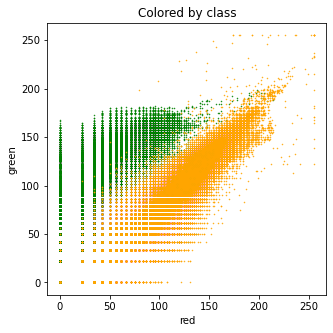

In [29]:
plt.figure(figsize=(5, 5))
plt.scatter(vegetationPixelsRGB[:,0], vegetationPixelsRGB[:,1], marker='.', s=1, color="green")
plt.scatter(soilPixelsRGB[:,0], soilPixelsRGB[:,1], marker='.', s=1, color="orange")
plt.title("Colored by class")
plt.xlabel("red")
plt.ylabel("green");

## Principal component analysis (PCA)
Do PCA on the pixel colors. Extract 2 principal components and plot pixels in random order.

In [19]:
from sklearn.decomposition import PCA
soilVegRGB = np.concatenate((soilPixelsRGB, vegetationPixelsRGB))
y = np.concatenate((np.repeat(0, np.shape(soilPixelsRGB)[0]), np.repeat(1, np.shape(vegetationPixelsRGB)[0])))
pcaFit = PCA(n_components=2).fit(soilVegRGB)
soilVegRGBY = np.concatenate((soilVegRGB, np.transpose([y])), axis = 1)
np.random.shuffle(soilVegRGBY)
principalComponents = pcaFit.transform(soilVegRGBY[:,0:3])

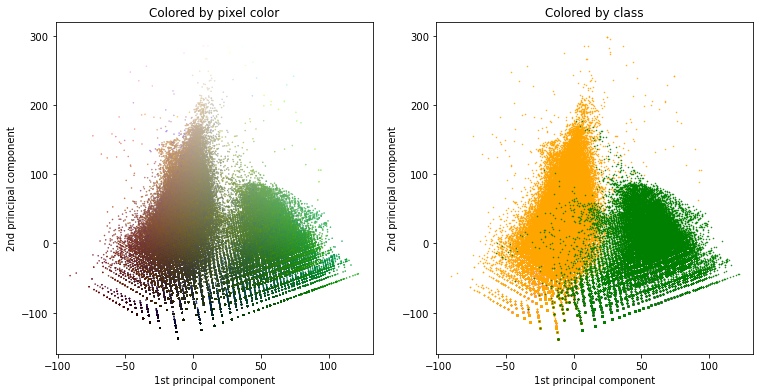

In [26]:
fig = plt.figure(figsize=(12.5, 6.1))
ax = fig.add_subplot(1, 2, 1)
ax.set_title("Colored by pixel color");
ax.set_xlabel("1st principal component")
ax.set_ylabel("2nd principal component")
ax.title.set_text('Colored by pixel color')
ax.scatter(principalComponents[:, 1], principalComponents[:, 0], marker='.', s=1, color=soilVegRGBY[:,0:3]/255.0)
ax = fig.add_subplot(1, 2, 2)
ax.title.set_text('Colored by class')
ax.set_xlabel("1st principal component")
ax.set_ylabel("2nd principal component")
ax.scatter(principalComponents[soilVegRGBY[:,3] == 0, 1], principalComponents[soilVegRGBY[:,3] == 0, 0], marker='.', s=1, color="orange")
ax.scatter(principalComponents[soilVegRGBY[:,3] == 1, 1], principalComponents[soilVegRGBY[:,3] == 1, 0], marker='.', s=1, color="green");

## Logistic regression
Do logistic regression on the pixel colors. It is expected that the split will be mostly based on the first principal component.

In [21]:
from sklearn.linear_model import LogisticRegression